In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import xlrd

In [ ]:
filename = 'default of credit card clients.xls'

In [ ]:
DATA = os.path.relpath('/Users/ben/Benborg/ml-blog/credit/data/' + filename)

In [ ]:
df = pd.read_excel(DATA, 'Data', index_col=[0], header=[1], na_values='NA')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

* Split the dataset, **train, test, split**

In [ ]:
X = df.iloc[:, :22]
y = df.iloc[:, 23]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### k-Means Clustering



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(init='random', n_clusters=2, n_init=10, max_iter=200, random_state=42).fit(X_train)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 2.83674183e+05,  1.57331731e+00,  1.80468750e+00,
         1.50600962e+00,  3.68996394e+01,  2.76442308e-01,
         2.47896635e-01,  2.17247596e-01,  1.76682692e-01,
         1.44531250e-01,  1.46935096e-01,  1.90051442e+05,
         1.85602306e+05,  1.80108695e+05,  1.66677600e+05,
         1.55567471e+05,  1.49142236e+05,  1.46585198e+04,
         1.60775589e+04,  1.33720249e+04,  1.18201352e+04,
         1.16559153e+04],
       [ 1.48479683e+05,  1.61000387e+00,  1.86193885e+00,
         1.55872678e+00,  3.52681405e+01, -6.38544892e-02,
        -1.92434211e-01, -2.30214783e-01, -2.84345975e-01,
        -3.31124226e-01, -3.58891254e-01,  2.85298009e+04,
         2.69093469e+04,  2.52887110e+04,  2.31047658e+04,
         2.15692457e+04,  2.09935957e+04,  4.22389140e+03,
         4.33244505e+03,  3.95200353e+03,  3.76368619e+03,
         3.71814512e+03]])

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
def plot_data(X):
    plt.scatter(X[0], X[1],  c='k', s=30)

def plot_centroids(centroids, weights=None, circle_color='k', cross_color='w'):
    if weights is not None:
        centroids =  centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap='viridis')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(10,7))
plot_decision_boundaries(kmeans, X_train)
plt.savefig('voronoi_exempts.png')
plt.show()

/Users/ben/Benborg/ml-blog/mlenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but KMeans is expecting 22 features as input.

<Figure size 720x504 with 0 Axes>

In [ ]:
# from scipy.spatial import Voronoi, voronoi_plot_2d
#
# vor = Voronoi(X_train)
# fig = voronoi_plot_2d(vor, show_vertices=True)
# plt.show()

## Principal Component Analysis


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_reduce = pca.fit_transform(X_train)

In [ ]:
pca.n_components_, pca.explained_variance_ratio_

(2, array([0.61072272, 0.29729969]))

* Almost all the **variance** is explained by these two components. Let's try `k-Means` again with only these two.

In [ ]:
X_train_reduce

array([[   -977.60220334, -100584.93299971],
       [-114722.50953568,  -92885.0797815 ],
       [ -75597.74683556,   57990.49015691],
       ...,
       [-154241.34324944,  -47130.34187774],
       [ -39566.13383388,  -90111.51714451],
       [ -91963.87331176,   44506.13176602]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_pca = KMeans(n_clusters=2, init='k-means++', max_iter=200, random_state=42).fit(X_train_reduce)

In [ ]:
pca_centroids = kmeans_pca.cluster_centers_

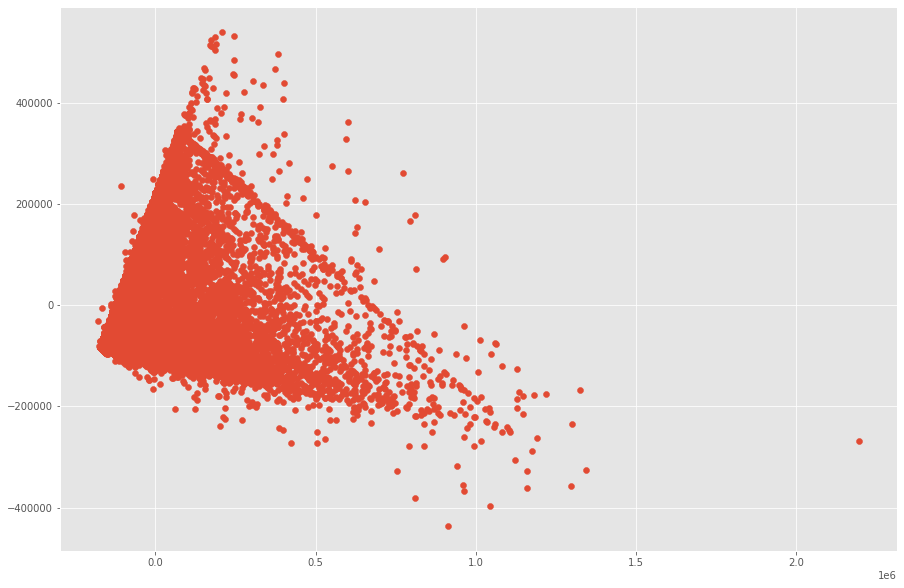

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.scatter(X_train_reduce[:, 0], X_train_reduce[:, 1])

In [ ]:
kmeans_pca.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
# from scipy.spatial import Voronoi, voronoi_plot_2d
#
# vor = Voronoi(pca_centroids)
# fig = voronoi_plot_2d(vor, show_points=True, show_vertices=True)
# # fig.set_size_inches(6,6)
#
# plt.show()

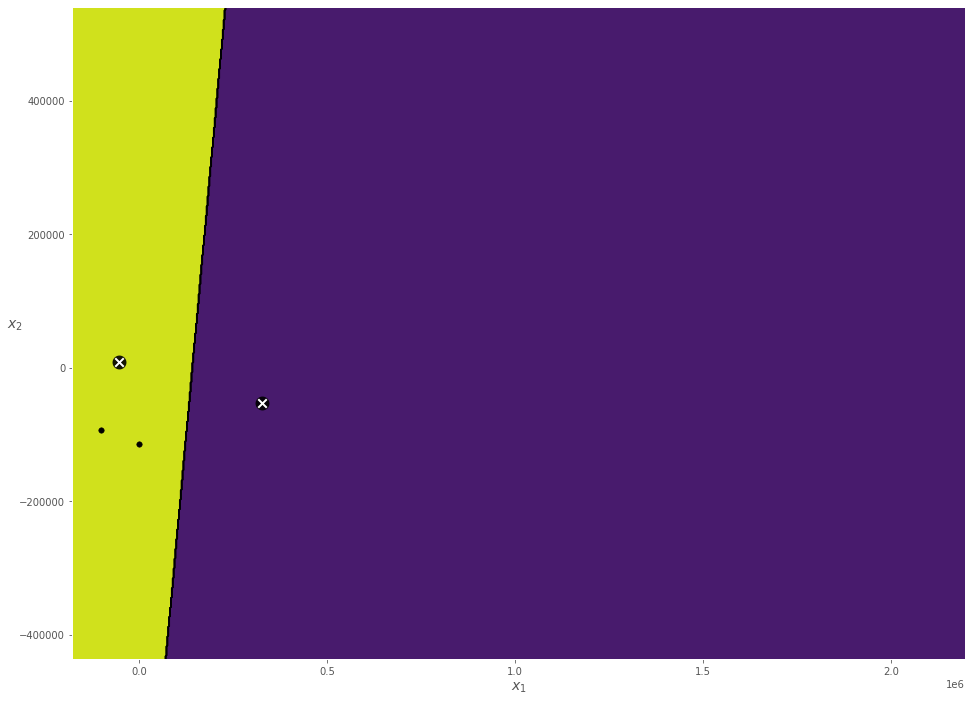

In [ ]:
plt.figure(figsize=(16,12))
plot_decision_boundaries(kmeans_pca, X_train_reduce)
plt.savefig('voronoi_credit.png')
plt.show()

In [ ]:
pca_centroids

array([[327875.66668953, -53170.77487821],
       [-52877.03087416,   8574.93553341]])

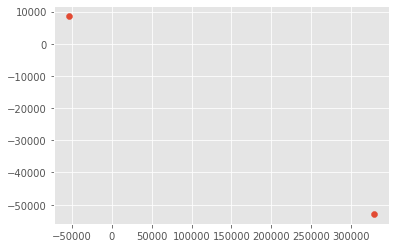

In [ ]:
plt.scatter(pca_centroids[0], pca_centroids[1])

* Clustering seems a bit extreme. The PCA analysis highlighted that almost 97% of the variance in the dataset was explained by the two principal components that were discovered. However, clustering the data with k-Means seems to show a very large discrepancy between one cluster and the other. This data point appears to be an outlier. Next, we will need to look to eliminate singular non-representative data points, then re-run the PCA algorithm.

In [ ]:
X_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000
mean,167226.653333,1.604917,1.854000,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,-0.265167,...,48914.770500,4.675708e+04,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250
std,129734.959196,0.488879,0.792176,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,1.132949,...,70923.493353,6.926506e+04,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2989.750000,2.699500e+03,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21140.500000,2.005000e+04,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63035.250000,5.952925e+04,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000


## Support Vector Machines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1, dual=False, random_state=42, max_iter=1000))
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, dual=False, random_state=42))])

In [ ]:
y_pred = svm_clf.predict(X_test)

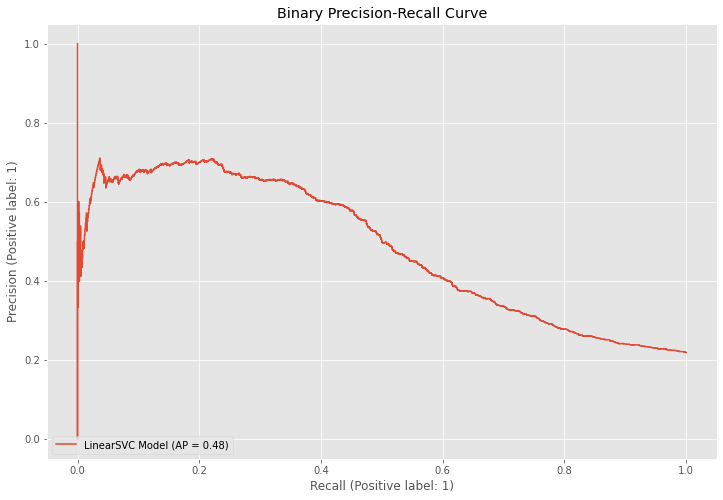

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, accuracy_score

display = PrecisionRecallDisplay.from_estimator(svm_clf, X_test, y_test, name='LinearSVC Model')
display.figure_.set_size_inches(12, 8)
_ = display.ax_.set_title('Binary Precision-Recall Curve')

In [ ]:
y_score = svm_clf.decision_function(X_test)

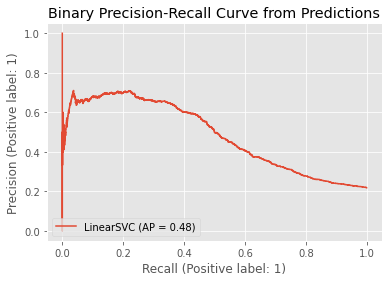

In [ ]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name='LinearSVC')
_ = display.ax_.set_title('Binary Precision-Recall Curve from Predictions')

In [ ]:
linsvm_acc = accuracy_score(y_test, y_pred)
print('LinearSVC Accuracy: ', round(linsvm_acc, 3))

LinearSVC Accuracy:  0.801


This is probably not a **linear** boundary.


In [ ]:
from sklearn.metrics import confusion_matrix

c_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(c_mat)

[[4594   93]
 [1099  214]]


In [ ]:
svc_err = (1099 + 93) / (4594 + 93 + 1099 + 214)
print('LinearSVC Error: ', round(svc_err, 3))
print('LinearSVC Accuracy: ', round(1 - svc_err, 3))

LinearSVC Error:  0.199
LinearSVC Accuracy:  0.801


### XGBoost for Feature Selection

In [ ]:
from xgboost import XGBClassifier

Feature: 0, Score: 0.02381
Feature: 1, Score: 0.01781
Feature: 2, Score: 0.02181
Feature: 3, Score: 0.01665
Feature: 4, Score: 0.01787
Feature: 5, Score: 0.34939
Feature: 6, Score: 0.16002
Feature: 7, Score: 0.05737
Feature: 8, Score: 0.03554
Feature: 9, Score: 0.03649
Feature: 10, Score: 0.03515
Feature: 11, Score: 0.02405
Feature: 12, Score: 0.01977
Feature: 13, Score: 0.02011
Feature: 14, Score: 0.01946
Feature: 15, Score: 0.01838
Feature: 16, Score: 0.01897
Feature: 17, Score: 0.02112
Feature: 18, Score: 0.02127
Feature: 19, Score: 0.02621
Feature: 20, Score: 0.02103
Feature: 21, Score: 0.01773


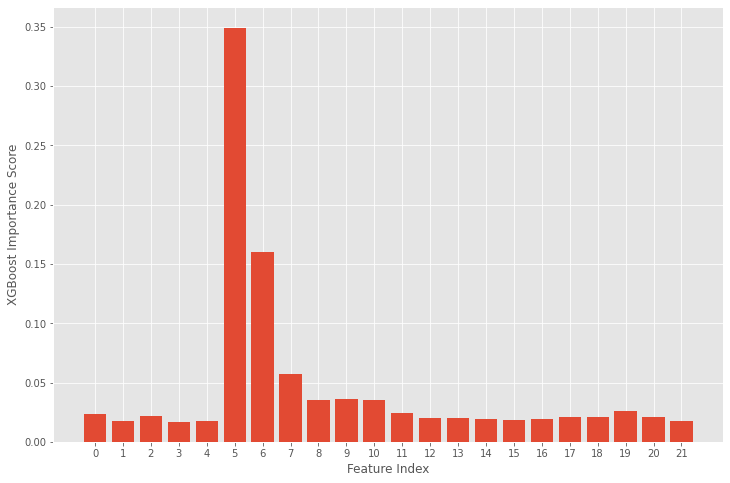

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_import = xgb_model.feature_importances_

for i, v in enumerate(xgb_import):
    print("Feature: %0d, Score: %.5f" % (i, v))

plt.figure(figsize=(12, 8))
plt.bar([x for x in range(len(xgb_import))], xgb_import)
plt.xticks(range(len(xgb_import)))
plt.xlabel('Feature Index')
plt.ylabel('XGBoost Importance Score')
plt.savefig('xgb_boost_importance.png')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
# from sklearn.svm import SVC

feat_sel = SelectFromModel(XGBClassifier())
feat_sel.fit(X_train, y_train)
X_train_feat_sel = feat_sel.transform(X_train)
X_test_feat_sel = feat_sel.transform(X_test)


### Non-Linear SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

rbf_kernel_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


In [ ]:
rbf_dec_func = rbf_kernel_svm.decision_function

In [ ]:
y_pred = rbf_kernel_svm.predict(X)
y_decision = rbf_kernel_svm.decision_function(X)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


<bound method Pipeline.decision_function of Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])>

In [ ]:
rbf_kernel_svm_fs = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf_fs', SVC(kernel='rbf', gamma=5, C=0.001))
])

rbf_kernel_svm_fs.fit(X_train_feat_sel, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_fs', SVC(C=0.001, gamma=5))])

In [ ]:
y_hat_fs = rbf_kernel_svm_fs.predict(X_test_feat_sel)

In [ ]:
fs_accuracy = accuracy_score(y_test, y_hat_fs)
print('RBF kernel SVM Classifier with XGBoosted Feature Selection Accuracy, SelectFromModel: ', round(fs_accuracy, 3))

RBF kernel SVM Classifier with XGBoosted Feature Selection Accuracy, SelectFromModel:  0.781


* Try without the `SelectFromModel` class...

In [ ]:
X_fs_train = X_train.iloc[:, 5:7]
X_fs_test = X_test.iloc[:, 5:7]
X_fs_train.head(), X_fs_test.head()

(       PAY_0  PAY_2
 ID                 
 21754      0      0
 252        0      0
 22942      0      0
 619        0      0
 17091      0      0,
        PAY_0  PAY_2
 ID                 
 2309       0      0
 22405      0      0
 23398      0      0
 25059      0      0
 2665       0      0)

In [ ]:
rbf_kernel_svm_fs_two = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf_fs', SVC(kernel='rbf', gamma=5, C=0.001, random_state=42))
])

rbf_kernel_svm_fs_two.fit(X_fs_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_fs', SVC(C=0.001, gamma=5))])

In [ ]:
y_hat_fs_two = rbf_kernel_svm_fs_two.predict(X_fs_test)

In [ ]:
fs_two_accuracy = accuracy_score(y_test, y_hat_fs_two)
print('RBF kernel SVM Classifier with XGBoosted Feature Selection Accuracy, Manual Selection: ', round(fs_two_accuracy, 3))

RBF kernel SVM Classifier with XGBoosted Feature Selection Accuracy, Manual Selection:  0.781


In [ ]:
lin_kernel_svm_fs = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf_fs_lin', SVC(kernel='linear', gamma='scale', C=1.0, random_state=42))
])

lin_kernel_svm_fs.fit(X_fs_train, y_train)

y_hat_fs_lin = lin_kernel_svm_fs.predict(X_fs_test)

fs_lin_accuracy = accuracy_score(y_test, y_hat_fs_lin)
print('Linear kernel SVM Classifier with XGBoosted Feature Selection Accuracy, Manual Selection: ', round(fs_lin_accuracy, 3))


Linear kernel SVM Classifier with XGBoosted Feature Selection Accuracy, Manual Selection:  0.81


* Raising `C=1.0` instead of `0.001`, with `gamma='scale'`, the **default** setting, the accuracy improves to **81%**, which is about where it was prior to trying **feature selection with XGBoost**.

#### Three features, not just two

In [ ]:
X_fs_three_train = X_train.iloc[:, 5:8]
X_fs_three_test = X_test.iloc[:, 5:8]
X_fs_three_train.head(), X_fs_three_test.head()

(       PAY_0  PAY_2  PAY_3
 ID                        
 21754      0      0      0
 252        0      0      0
 22942      0      0     -1
 619        0      0      0
 17091      0      0      0,
        PAY_0  PAY_2  PAY_3
 ID                        
 2309       0      0      0
 22405      0      0      0
 23398      0      0      0
 25059      0      0      0
 2665       0      0      0)

In [ ]:
lin_kernel_svm_fs_three = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf_fs_lin', SVC(kernel='linear', gamma=1, C=1.0, random_state=42))
])

lin_kernel_svm_fs_three.fit(X_fs_three_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_fs_lin',
                 SVC(gamma=1, kernel='linear', random_state=42))])

In [ ]:
y_hat_fs_lin_three = lin_kernel_svm_fs_three.predict(X_fs_three_test)

fs_lin_three_accuracy = accuracy_score(y_test, y_hat_fs_lin_three)
print('Linear kernel SVM Classifier with XGBoosted Feature Selection Accuracy, Manual Selection: ', round(fs_lin_three_accuracy, 3))


Linear kernel SVM Classifier with XGBoosted Feature Selection Accuracy, Manual Selection:  0.81
